# Data Science Boot Camp Capstone Project
Wisconsin Breast Cancer Dataset |
[Found Here on Kaggle](https://www.kaggle.com/uciml/breast-cancer-wisconsin-data)

## Attribute Information:

The mean, standard error and "worst" or largest (mean of the three
largest values) of these features were computed for each image,
resulting in 30 features. For instance, field 3 is Mean Radius, field
13 is Radius SE, field 23 is Worst Radius.

Field Information:

1. ID number
2. Diagnosis (0 = benign, 1 = malignant)
3. radius (mean of distances from center to points on the perimeter)
4. texture (standard deviation of gray-scale values)
5. perimeter
6. area
7. smoothness (local variation in radius lengths)
8. compactness (perimeter^2 / area - 1.0)
9. concavity (severity of concave portions of the contour)
10. concave points (number of concave portions of the contour)
11. symmetry
12 fractal dimension ("coastline approximation" - 1)

## Project Requirements besides ML.
**3 Possible Interesting Questions Regarding the Data**
1. Is there a relationship between the size of a sample and the diagnosis?
2. What feature has the highest coorelation with a malignant diagnosis?
3. What is the capacity for different ML algorithms to correctly predict the diagnosis of this dataset. Meaning, are machine learning algorithms a viable option for diagnosis?

**Hypothesis and p-test for 2 variables.**

## Beginning Python Analysis and Machine Learning

In [1]:
#Import necessary basic packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Import CSV to Pandas DataFrame.
df = pd.read_csv('breast_cancer.csv')

In [3]:
#Verify that import was successful.
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
#Initial descriptive analysis of variables.
df.describe()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [5]:
#Looking for NaNs in dataset.
df.isna().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

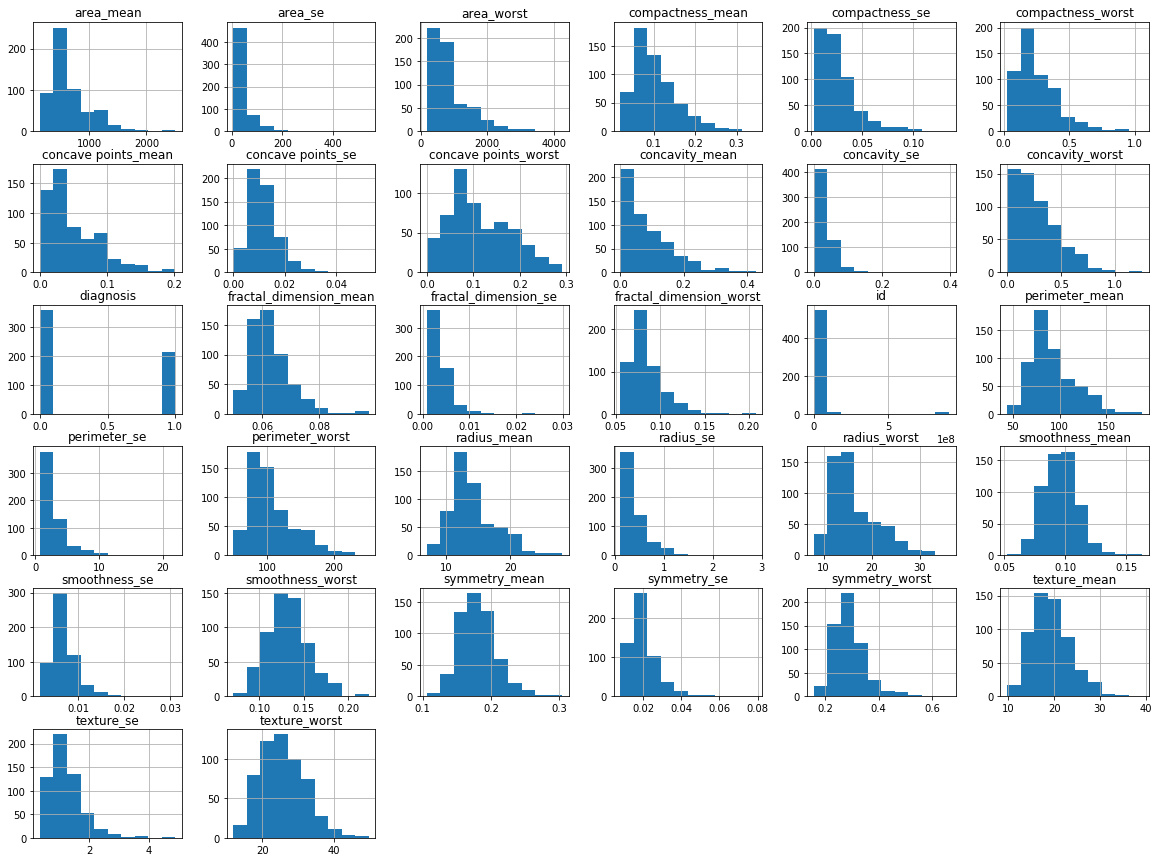

In [6]:
#Evaluating histograms of variables for distribution shape and skew.
df.hist(bins=10, figsize=(20,15))
plt.show()

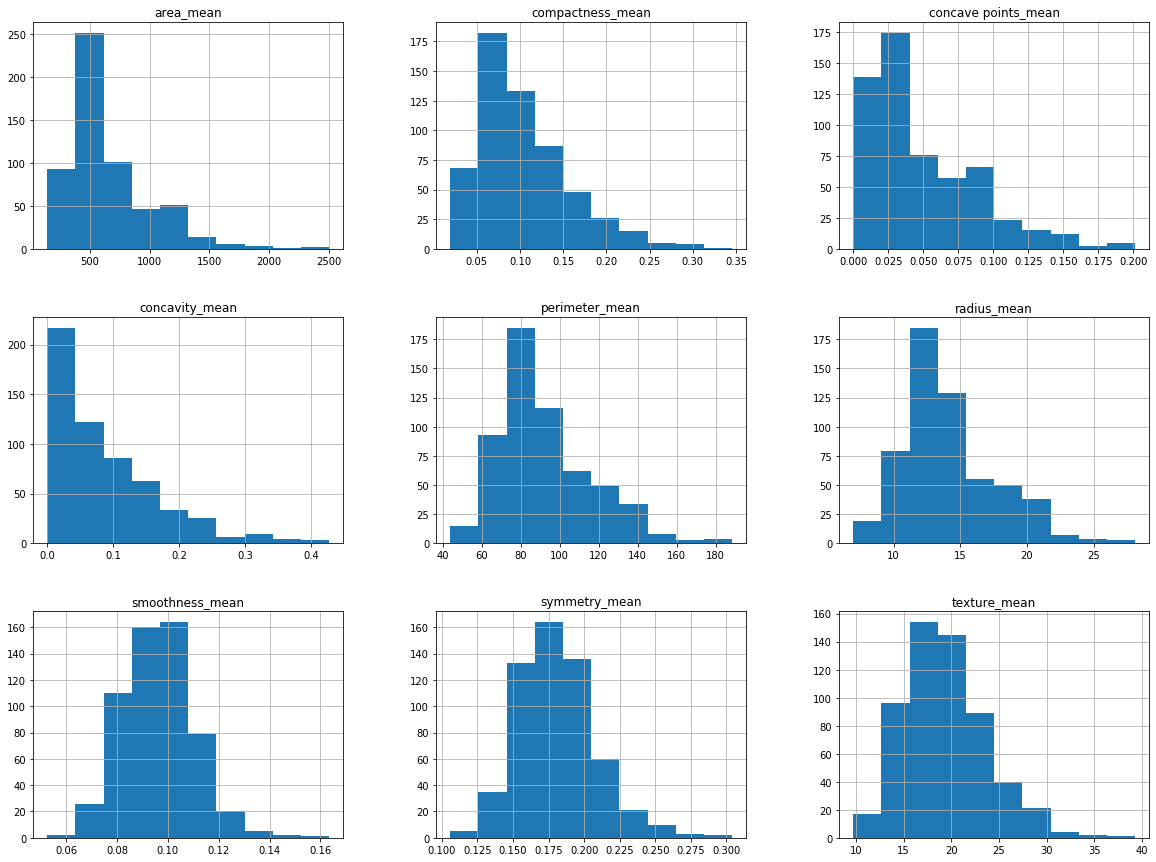

In [7]:
#Taking closer look at distribution of variable means.
df.iloc[:,2:11].hist(bins=10, figsize=(20,15))
plt.show()

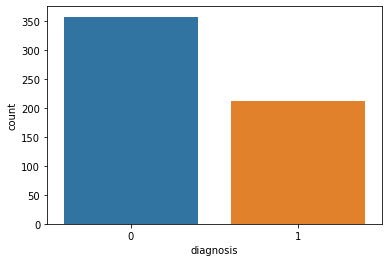

In [8]:
#Looking at diagnosis counts to determine class imbalance.
sns.countplot(df['diagnosis'], label='count')

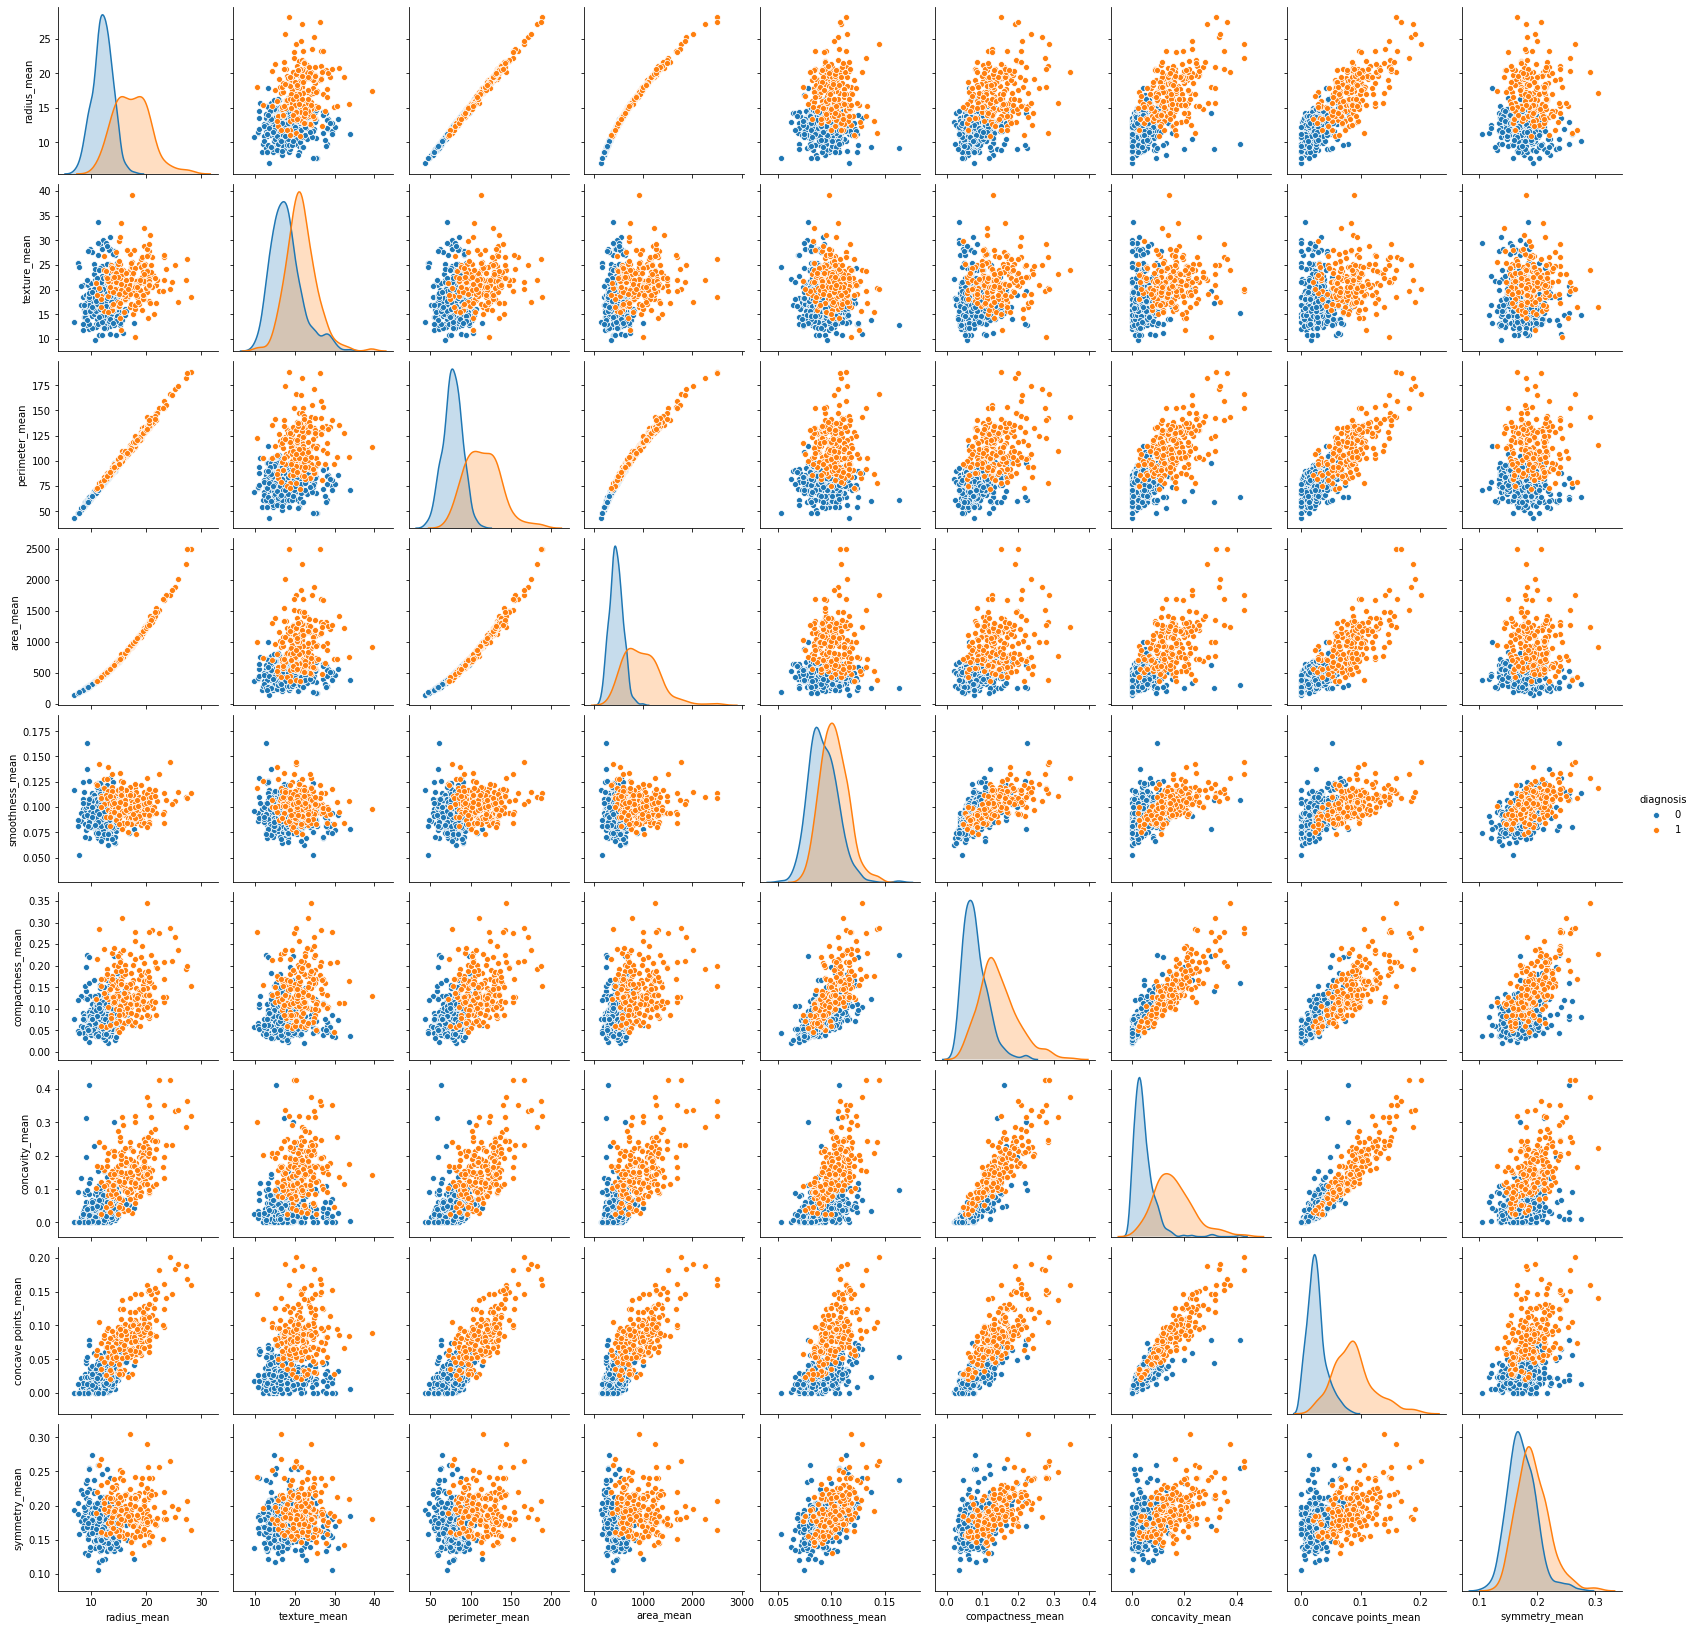

In [9]:
#Using sns pairplot to get an initial view at diagnosis trends.
sns.pairplot(df.iloc[:,1:11], hue='diagnosis')
plt.show()

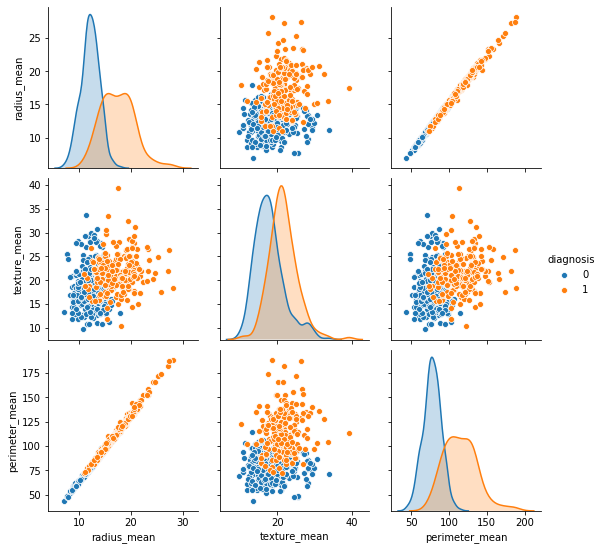

In [10]:
#Using pairplot to analyze interesting relationships.
sns.pairplot(df.iloc[:,1:5], hue='diagnosis')
plt.show()

In [11]:
#Quanitifying min, max, and mean of radius_mean with diagnosis.
print(df.groupby(['diagnosis']).radius_mean.min())
print(df.groupby(['diagnosis']).radius_mean.max())
print(df.groupby(['diagnosis']).radius_mean.mean())

diagnosis
0     6.981
1    10.950
Name: radius_mean, dtype: float64
diagnosis
0    17.85
1    28.11
Name: radius_mean, dtype: float64
diagnosis
0    12.146524
1    17.462830
Name: radius_mean, dtype: float64


**Question 1: Is there a relationship between the size of a sample and the diagnosis?**

As shown by the graphs above, there is a definite relationship between the size of the unknown mass in the image, and the diagnosis of said mass.

Looking at the radius_mean and perimeter_mean scatter plot allows us to visualize this relationship.

Looking at the min-max below the graphs, when the radius of the mass is below approximately 10.95mm, there are no malignant diagnoses. However, when the radius rises over 10.95mm, malignant cases begin to appear.

There is an overlap in malignant and benign cases between 10.95mm and 17.85mm where masses can be of either diagnosis.

Once masses have reached a measured size of 17.85mm, all masses have came back as malignant.

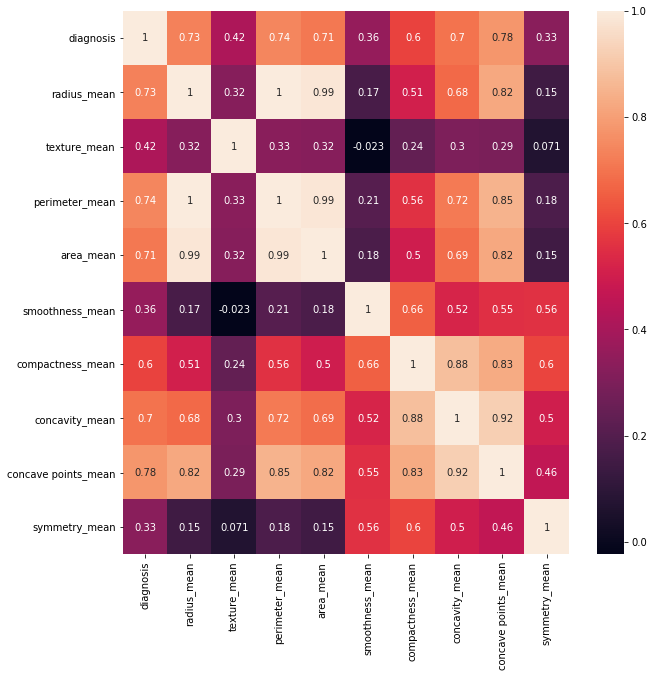

In [12]:
#Using heatmap to visualize correlation between variables and diagnosis.
plt.figure(figsize=(10,10))
sns.heatmap(df.iloc[:,1:11].corr(), annot=True)

**Question 2: What feature has the highest coorelation with a malignant diagnosis?**

Looking at the sns heatmap above, the feature with the highest coorelation with a malignant diagnosis is with the concavepoints_mean feature. This tells us that the shape, as well as the size plays a large role in a malignant diagnosis.

### Feature Engineering

Disclaimer: the below features made the models less accurate and were not used in the later ML algorithms.

In [13]:
#Aggregating features for feature engineering
df['radiusperimeter'] = df['radius_mean']*df['perimeter_mean']
df['concavityconcavepoints'] = df['concavity_mean']*df['concave points_mean']
df['texturesmooth'] = df['texture_mean']*df['smoothness_mean']

### ML Algorithm Training and Analysis

In [14]:
#Splitting test and training data. Train size = 70%.
from sklearn.model_selection import train_test_split

X = df.iloc[:,2:11]
y = df['diagnosis'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)

In [15]:
#Using standard scaler to scale feature values.
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.fit_transform(X_test)

In [16]:
#Creating parameter grid for CVGridSearch to optimize Logistic Regression.
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

logregest = LogisticRegression()

param_grid = [
    {'penalty' : ['l2'],
    'C' : np.logspace(0, 5, 20),
    'solver' : ['lbfgs', 'newton-cg', 'liblinear', 'sag', 'saga'],
     'max_iter' : [500, 1000, 2500]
    }
]

In [17]:
#Creating GridSearch object.
clf = GridSearchCV(logregest, param_grid = param_grid, cv = 5, verbose=True, n_jobs=-1)

#best_clf = clf.fit(X_train, y_train)

'''Fitting 5 folds for each of 300 candidates, totalling 1500 fits

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 1472 tasks      | elapsed:   11.5s
[Parallel(n_jobs=-1)]: Done 1489 out of 1500 | elapsed:   11.7s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed:   12.1s finished
'''

'Fitting 5 folds for each of 300 candidates, totalling 1500 fits\n\n[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.\n[Parallel(n_jobs=-1)]: Done 100 tasks      | elapsed:    0.2s\n[Parallel(n_jobs=-1)]: Done 1472 tasks      | elapsed:   11.5s\n[Parallel(n_jobs=-1)]: Done 1489 out of 1500 | elapsed:   11.7s remaining:    0.0s\n[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed:   12.1s finished\n'

In [18]:
#Running GridSearch for Logistic Regression.
#best_clf.best_estimator_

'''LogisticRegression(C=1.8329807108324359, max_iter=500)'''

'LogisticRegression(C=1.8329807108324359, max_iter=500)'

In [19]:
#Running Logistic Regression with GridSearch parameters and scoring model.
logreg = LogisticRegression(C=1.8329807108324359, max_iter=500, random_state=0)
logreg.fit(X_train, y_train)
logreg.score(X_train, y_train)

0.9447236180904522

In [20]:
#Creating Logistic Regression results.
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

y_pred = logreg.predict(X_test)
target_names = ['benign', 'malignant']
labels = [0, 1]
print(confusion_matrix(y_test, y_pred, labels=labels))
print(classification_report(y_test, y_pred, target_names=target_names))

[[102   6]
 [  6  57]]
              precision    recall  f1-score   support

      benign       0.94      0.94      0.94       108
   malignant       0.90      0.90      0.90        63

    accuracy                           0.93       171
   macro avg       0.92      0.92      0.92       171
weighted avg       0.93      0.93      0.93       171



### Interpreting Logistic Regression Results

Accuracy = How often is the classifier correct? Accuracy = (TP+TN)/N = (102+57)/171 = 92.98%

Recall = How often does the model correctly predict a positive (malignant) case? = TP/nPositive = 57/63 = 90.48%.

Precision = How often does the model classify a positive (malignant) case correctly? = TP/totalPostive = 57/63 = 90.48%.

F1 Score = Weighted average of precision and recall. = 2 * (precision * recall) / (precision + recall) = 90.48%.

Based on the F1 score of this model. The Logistic Regression model would be considered **greatly accurate**.

In [21]:
#Creating parameter grid for CVGridSearch to optimize Random Forest Classifier.
from sklearn.ensemble import RandomForestClassifier

randforestest = RandomForestClassifier()

param_grid1 = [
    {'n_estimators' : [int(x) for x in np.linspace(start = 1, stop = 80, num =10)],
    'max_features' : ['auto', 'sqrt'],
    'max_depth' : [2, 4],
    'min_samples_split' : [2, 5],
    'min_samples_leaf' : [1, 2],
    'bootstrap' : [True, False]
    }
]

#Creating GridSearch object.

'''clf1 = GridSearchCV(randforestest, param_grid = param_grid1, cv = 5, verbose=True, n_jobs=-1)

best_clf1 = clf1.fit(X_train, y_train)'''

'clf1 = GridSearchCV(randforestest, param_grid = param_grid1, cv = 5, verbose=True, n_jobs=-1)\n\nbest_clf1 = clf1.fit(X_train, y_train)'

In [22]:
#Running GridSearch for Random Forest Classifier.

#best_clf1.best_estimator_

In [23]:
#Running Random Forest Classifier with GridSearch parameters and scoring model.

randforest = RandomForestClassifier(bootstrap=False, max_depth=4, max_features='sqrt',
                       n_estimators=27, random_state=0)
randforest.fit(X_train, y_train)
randforest.score(X_train, y_train)

0.9748743718592965

In [24]:
#Creating Random Forest Classifier results.
y_pred1 = randforest.predict(X_test)
target_names = ['benign', 'malignant']
labels = [0, 1]
print(confusion_matrix(y_test, y_pred1, labels=labels))
print(classification_report(y_test, y_pred1, target_names=target_names))

[[97 11]
 [ 4 59]]
              precision    recall  f1-score   support

      benign       0.96      0.90      0.93       108
   malignant       0.84      0.94      0.89        63

    accuracy                           0.91       171
   macro avg       0.90      0.92      0.91       171
weighted avg       0.92      0.91      0.91       171



### Interpreting Random Forest Classifier Results

Accuracy = How often is the classifier correct? Accuracy = (TP+TN)/N = (59+97)/171 = 91.23%

Recall = How often does the model correctly predict a positive (malignant) case? = TP/nPositive = 59/63 = 93.65%.

Precision = How often does the model classify a positive (malignant) case correctly? = TP/totalPostive = 59/70 = 84.29%.

F1 Score = Weighted average of precision and recall. = 2 * (precision * recall) / (precision + recall) = 88.72%.

Based on the F1 score of this model. The Random Forest Classifier is **highly accurate**; however is has a propensity to overcall malignant cases in comparison to the Logistic Regression model.

In [25]:
#Creating parameter grid for CVGridSearch to optimize GaussianNB
from sklearn.naive_bayes import GaussianNB

nbest = GaussianNB()

param_grid2 = [
    {'var_smoothing' : [0.000000001,0.0000001,0.00001,0.001,0.1]
    }
]

'''clf2 = GridSearchCV(nbest, param_grid = param_grid2, cv = 5, verbose=True, n_jobs=-1)

best_clf2 = clf2.fit(X_train, y_train)'''

'clf2 = GridSearchCV(nbest, param_grid = param_grid2, cv = 5, verbose=True, n_jobs=-1)\n\nbest_clf2 = clf2.fit(X_train, y_train)'

In [26]:
#best_clf2.best_estimator_

'''GaussianNB()'''

'GaussianNB()'

In [27]:
#Running GaussianNB with GridSearch parameters and scoring model.
nb = GaussianNB()
nb.fit(X_train, y_train)
nb.score(X_train, y_train)

0.9221105527638191

In [28]:
#Creating GaussianNB results.
y_pred2 = nb.predict(X_test)
target_names = ['benign', 'malignant']
labels = [0, 1]
print(confusion_matrix(y_test, y_pred2, labels=labels))
print(classification_report(y_test, y_pred2, target_names=target_names))

[[99  9]
 [ 8 55]]
              precision    recall  f1-score   support

      benign       0.93      0.92      0.92       108
   malignant       0.86      0.87      0.87        63

    accuracy                           0.90       171
   macro avg       0.89      0.89      0.89       171
weighted avg       0.90      0.90      0.90       171



### Interpreting Random Forest Classifier Results

Accuracy = How often is the classifier correct? Accuracy = (TP+TN)/N = (55+99)/171 = 90.05%

Recall = How often does the model correctly predict a positive (malignant) case? = TP/nPositive = 55/63 = 87.30%.

Precision = How often does the model classify a positive (malignant) case correctly? = TP/totalPostive = 55/64 = 85.93%.

F1 Score = Weighted average of precision and recall. = 2 * (precision * recall) / (precision + recall) = 86.61%.

Based on the F1 score of this model. The Random Forest Classifier is **highly accurate**; however is has a propensity to overcall both benign and malignant malignant cases in comparison to the Logistic Regression model.

**Question 3: What is the capacity for different ML algorithms to correctly predict the diagnosis of this dataset. Meaning, are machine learning algorithms a viable option for diagnosis?**

Looking at the very high score of each classifier algorithm above, infers that ML algorithms can be of a great help when determining whether or not a measured mass is malignant.

This is not to say that algorithms should be the only process involved when determining if a mass is a malignant, but they can be used to possibly prioritize the testing of masses so that masses identified as malignant can be tested first. This would allow resources to be allocated in the most efficient manner so that malignant cases can begin treatment as soon as possible.

The outcome of this refined process would get people into treatment sooner and can possibly minimize the potential suffering of the patient.


**Null Hypothesis: The relationship between mass radius and the diagnosis is purely coincidental or due to an undersized sample.**

In [29]:
from scipy import stats
ttest,pval = stats.ttest_ind(df['diagnosis'], df['radius_mean'])
print(pval)

if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

0.0
reject null hypothesis


Being that the P-value between the mean radius of a mass and the diagnosis is less than 0.05, we can reject the null hypothesis that a relationship between the mass radius and the diagnosis is coincidental or due to an undersized sample.